# 武汉二手房市场全流程智能分析市场(数据清洗)

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
# 设置 Matplotlib 使用支持中文的字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

## 数据大体预览

In [2]:
df=pd.read_csv("wuhan_houses.csv")
df.head()

,户型,建筑面积,朝向,楼层,装修,建筑年代,电梯,产权性质,住宅类别,建筑结构,建筑类别,区域,单价,地铁,地铁距离,总价
0,2室1厅1卫,64.48平米,东南,低层,精装修,2006年,有,商品房,普通住宅,平层,板楼,硚口,13958元/平米,1号线,587米,90.0
1,2室2厅1卫,64.1平米,西南,中层,精装修,NaN,有,商品房,普通住宅,平层,板楼,江岸,16069元/平米,8号线,946米,103.0
2,4室2厅2卫,147平米,南北,高层,精装修,2017年,有,个人产权,个人产权,平层,板楼,硚口,12245元/平米,1号线,532米,180.0
3,1室0厅1卫,27.56平米,南,中层,精装修,NaN,无,个人产权,个人产权,平层,NaN,江岸,30842元/平米,1号线,375米,85.0
4,3室2厅1卫,92.13平米,东南,顶层,精装修,NaN,有,个人产权,个人产权,平层,板楼,硚口,12482元/平米,1号线,468米,115.0


In [3]:
df.shape

(11067, 16)

In [4]:
df.isnull().sum()

户型       21
建筑面积     21
朝向      386
楼层      386
装修       21
建筑年代    434
电梯      386
产权性质    386
住宅类别     22
建筑结构    464
建筑类别    524
区域       21
单价       21
地铁        0
地铁距离      0
总价       21
dtype: int64

In [5]:
#查看数据类别
for i in ['朝向','楼层','装修','电梯','产权性质','住宅类别','建筑结构','建筑类别','区域','地铁','建筑年代']:
    print(i+":",df[i].unique())

朝向: ['东南' '西南' '南北' '南' '西' '东北' nan '北' '东' '西北' '东西']
楼层: ['低层' '中层' '高层' '顶层' '底层' nan]
装修: ['精装修' '简装修' '毛坯' '中装修' '豪华装修' nan]
电梯: ['有' '无' nan]
产权性质: ['商品房' '个人产权' nan '经济适用房']
住宅类别: ['普通住宅' '个人产权' '独栋' '平层' '公寓' '经济适用房' nan '双拼' '联排' '叠加']
建筑结构: ['平层' nan '复式']
建筑类别: ['板楼' nan]
区域: ['硚口' '江岸' '武昌' '沌口' '东湖高新区' '洪山' '汉阳' '青山' '江汉' '蔡甸' '武汉周边' '东西湖' '江夏'
 '黄陂' '经济开发区' '汉南' nan]
地铁: ['1号线' '8号线' '无' '5号线' '7号线' '19号线' '11号线' '2号线' '6号线' '4号线' '3号线' '21号线'
 '16号线']
建筑年代: ['2006年' nan '2017年' '1997年' '2023年' '2020年' '2005年' '2022年' '2008年'
 '2002年' '2014年' '2011年' '2019年' '2021年' '2013年' '2016年' '2025年' '2012年'
 '1999年' '2018年' '2015年' '2003年' '1998年' '2024年' '2026年' '年' '2010年'
 '2009年' '2000年' '1990年' '2007年' '2004年' '1994年' '1900年' '1996年' '1995年'
 '20015年' '2001年' '202年' '1992年']


In [6]:
#删掉含有异常值的行
df=df[df["住宅类别"]!='个人产权']
df=df[df["建筑年代"]!='年']
df=df[df["建筑年代"]!='202年']

In [7]:
#查看数据格式
df.dtypes

户型       object
建筑面积     object
朝向       object
楼层       object
装修       object
建筑年代     object
电梯       object
产权性质     object
住宅类别     object
建筑结构     object
建筑类别     object
区域       object
单价       object
地铁       object
地铁距离     object
总价      float64
dtype: object

## 数据清洗

### 1.重复值处理

In [8]:
df.duplicated().sum()

np.int64(2333)

In [9]:
#删除重复值
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(6259, 16)

### 2.缺失值处理

In [11]:
#查看大体信息
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6259 entries, 0 to 11064
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   户型      6258 non-null   object 
 1   建筑面积    6258 non-null   object 
 2   朝向      5991 non-null   object 
 3   楼层      5991 non-null   object 
 4   装修      6258 non-null   object 
 5   建筑年代    6006 non-null   object 
 6   电梯      5991 non-null   object 
 7   产权性质    5991 non-null   object 
 8   住宅类别    6257 non-null   object 
 9   建筑结构    5941 non-null   object 
 10  建筑类别    5922 non-null   object 
 11  区域      6258 non-null   object 
 12  单价      6258 non-null   object 
 13  地铁      6259 non-null   object 
 14  地铁距离    6259 non-null   object 
 15  总价      6258 non-null   float64
dtypes: float64(1), object(15)
memory usage: 831.3+ KB


有部分缺失值

<Axes: >

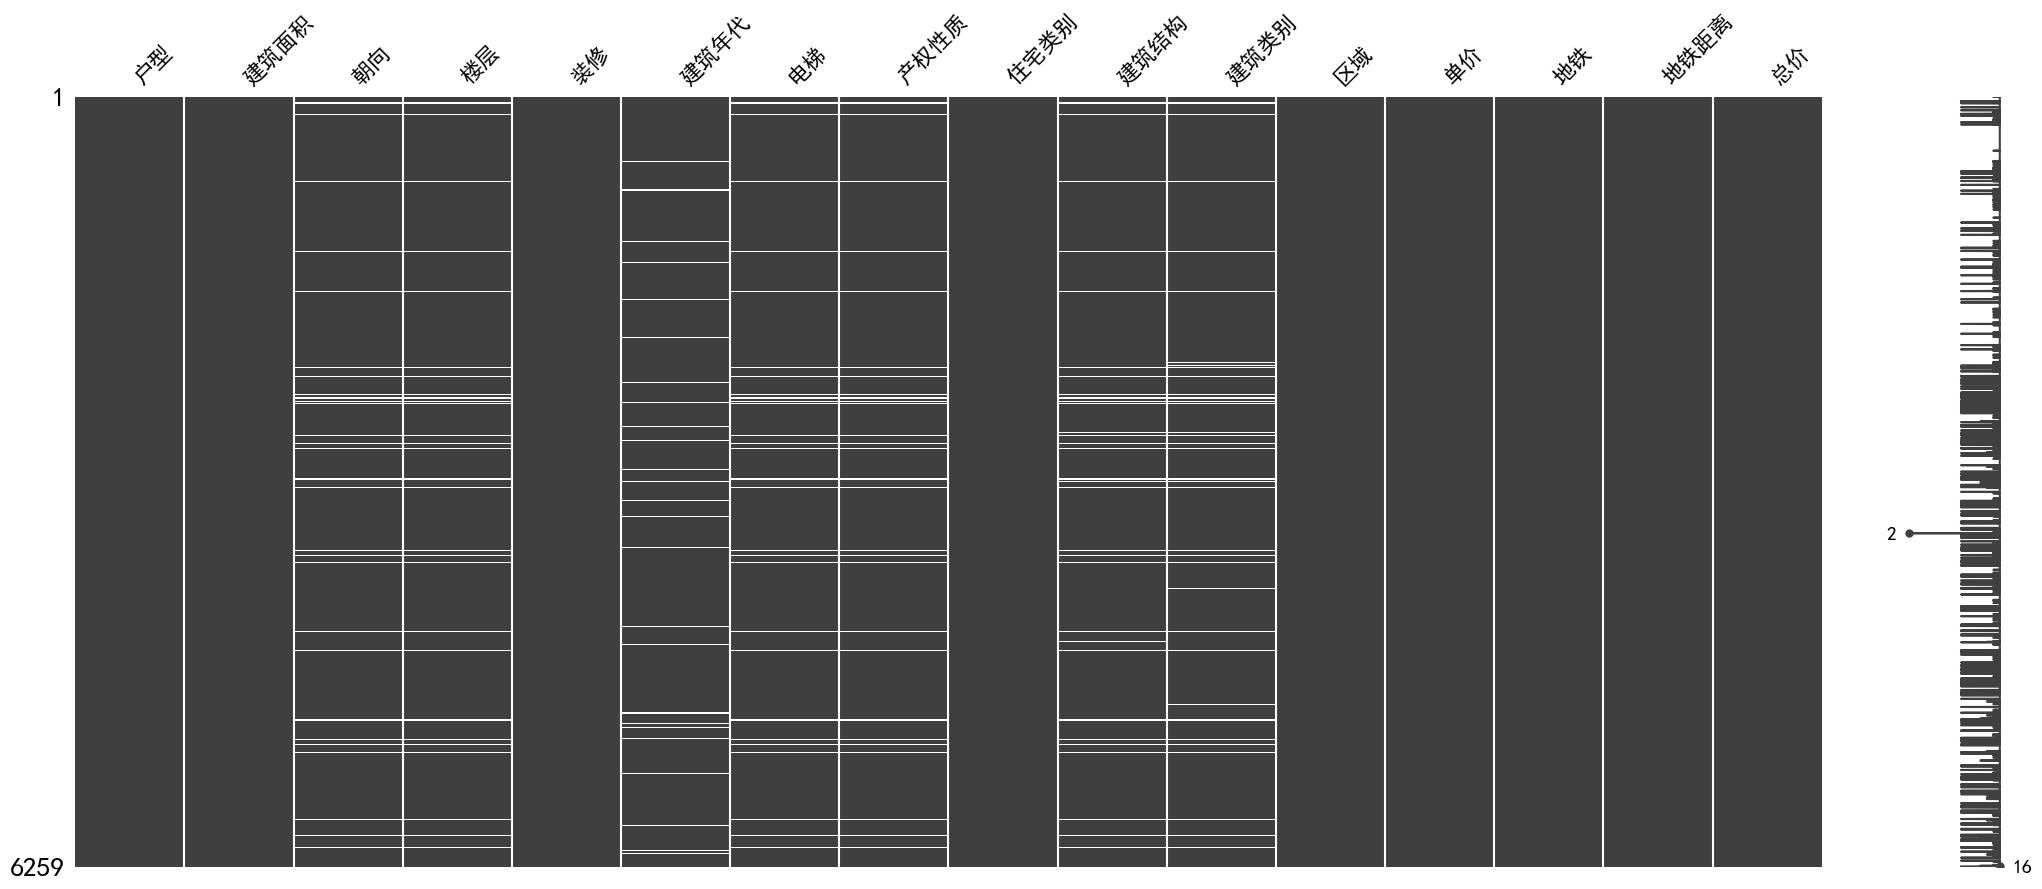

In [12]:
#查看缺失值的分布
msno.matrix(df)

可以看到数据分布，可以观察到，某些数据的**缺失值是有相关性**的

<Axes: >

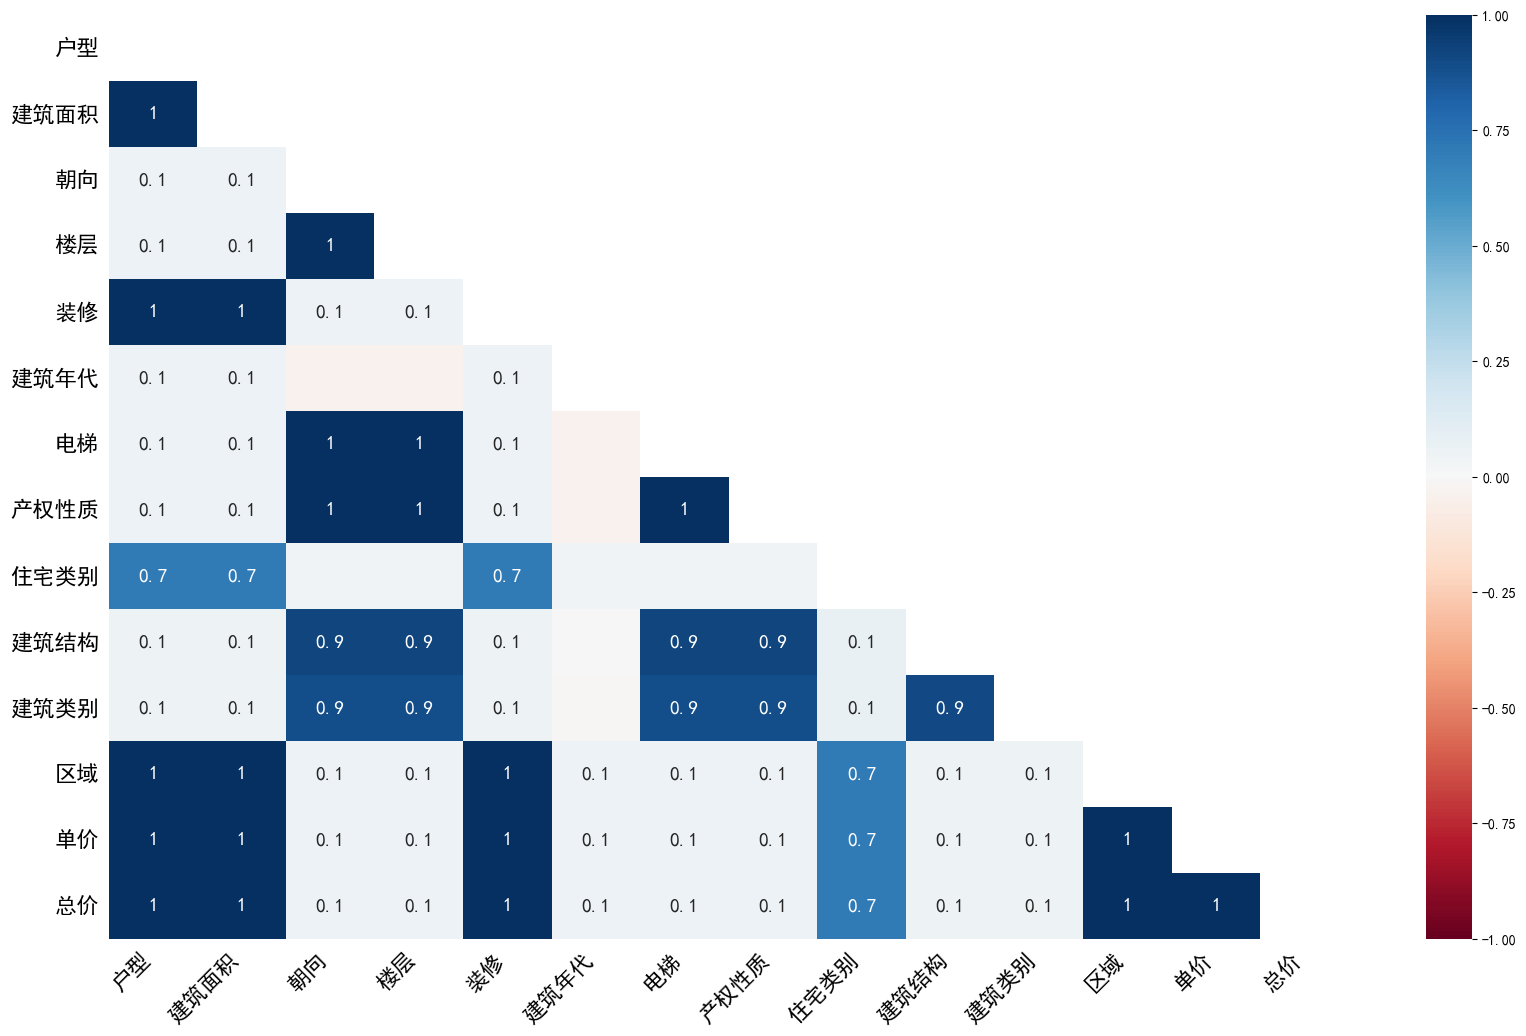

In [13]:
#通过热力图，查看缺失值的相关性
msno.heatmap(df)

朝向如果发生缺失，那么楼层、电梯、产权性质一定会缺失，建筑结构，建筑类别大概率会发生缺失

他们这几个字段的缺失值的相关性是很高的，大概率不是随机缺失

查看缺失值的比例

In [14]:
#查看缺失比例
df.apply(lambda x: x.isnull().sum()/df.shape[0]*100)

户型      0.015977
建筑面积    0.015977
朝向      4.281834
楼层      4.281834
装修      0.015977
建筑年代    4.042179
电梯      4.281834
产权性质    4.281834
住宅类别    0.031954
建筑结构    5.080684
建筑类别    5.384247
区域      0.015977
单价      0.015977
地铁      0.000000
地铁距离    0.000000
总价      0.015977
dtype: float64

因为朝向、楼层、电梯、产权性质他们发生缺失的比例很少，并且他们是在同一行相关缺失的，所以可以直接删掉

In [15]:
df.dropna(subset=['朝向','楼层','电梯','产权性质'],inplace=True)

In [16]:
#对于住宅类别、建筑结构、建筑类别的缺失，缺失值占比很小，且很难处理，所以可以直接删除
df.dropna(subset=['住宅类别','建筑结构','建筑类别'],inplace=True)

In [17]:
#查看缺失比例
df.apply(lambda x: x.isnull().sum()/df.shape[0]*100)

户型      0.000000
建筑面积    0.000000
朝向      0.000000
楼层      0.000000
装修      0.000000
建筑年代    4.101695
电梯      0.000000
产权性质    0.000000
住宅类别    0.000000
建筑结构    0.000000
建筑类别    0.000000
区域      0.000000
单价      0.000000
地铁      0.000000
地铁距离    0.000000
总价      0.000000
dtype: float64

In [18]:
#对于建筑年代，影响不会特别大。所以将缺失值填补
#对年进行数值型分析

In [19]:
#单位去除
#单价
df["单价"] = df["单价"].str.replace("元/平米", "").astype(float)
#去掉建筑年代的年
df["建筑年代"]=df["建筑年代"].fillna("0年")
df['建筑年代'] = df['建筑年代'].str.replace('年', '').astype(int)
df["建筑年代"].unique()

array([ 2006,     0,  2005,  2020,  2008,  2017,  2002,  2014,  2011,
        2019,  2021,  2013,  2023,  2016,  2025,  2012,  1999,  2018,
        2022,  2015,  2003,  2024,  2010,  2009,  2000,  2026,  1990,
        2007,  2004,  1994,  1998,  1996,  1997,  1995, 20015,  2001])

In [20]:
#去除面积的单位
df["建筑面积"]=df["建筑面积"].str.replace("平米", "").astype(float)

In [21]:
df["建筑年代"].describe()

count     5900.000000
mean      1932.400339
std        463.379250
min          0.000000
25%       2006.000000
50%       2006.000000
75%       2019.000000
max      20015.000000
Name: 建筑年代, dtype: float64

In [22]:
#选择下四分位和上四分位中间的年份，随机填补建筑年代的0值
Q1 = df['建筑年代'].quantile(0.25)
Q3 = df['建筑年代'].quantile(0.75)
def replace_with_random(row):
    if row == 0:
        return np.random.randint(int(Q1), int(Q3) + 1)  # 生成随机整数
    return row

df['建筑年代'] = df['建筑年代'].apply(replace_with_random)
df["建筑年代"].unique()

array([ 2006,  2009,  2005,  2020,  2008,  2017,  2002,  2014,  2011,
        2019,  2021,  2013,  2023,  2016,  2025,  2012,  1999,  2018,
        2022,  2015,  2003,  2010,  2007,  2024,  2000,  2026,  1990,
        2004,  1994,  1998,  1996,  1997,  1995, 20015,  2001])

### 3.异常值处理

In [23]:
#对数值数据进行描述性分析
df.describe()

,建筑面积,建筑年代,单价,总价
count,5900.000000,5900.000000,5900.000000,5900.000000
mean,121.114946,2014.947119,16912.711864,222.117444
std,44.232333,234.475658,7846.048144,198.424645
min,27.000000,1990.000000,2170.000000,23.000000
25%,92.907500,2006.000000,11752.500000,119.000000
50%,113.000000,2006.000000,15074.000000,163.000000
75%,135.250000,2019.000000,20000.000000,245.000000
max,717.300000,20015.000000,95453.000000,3300.000000


二手房的最小面积为27.56平米，最大是550平米，最便宜的是22万，最贵的是4500万

面积集中在97-138平米之间

因为要考虑大多数人可以购买的情况，所以可以将超高价格当做异常值删除掉

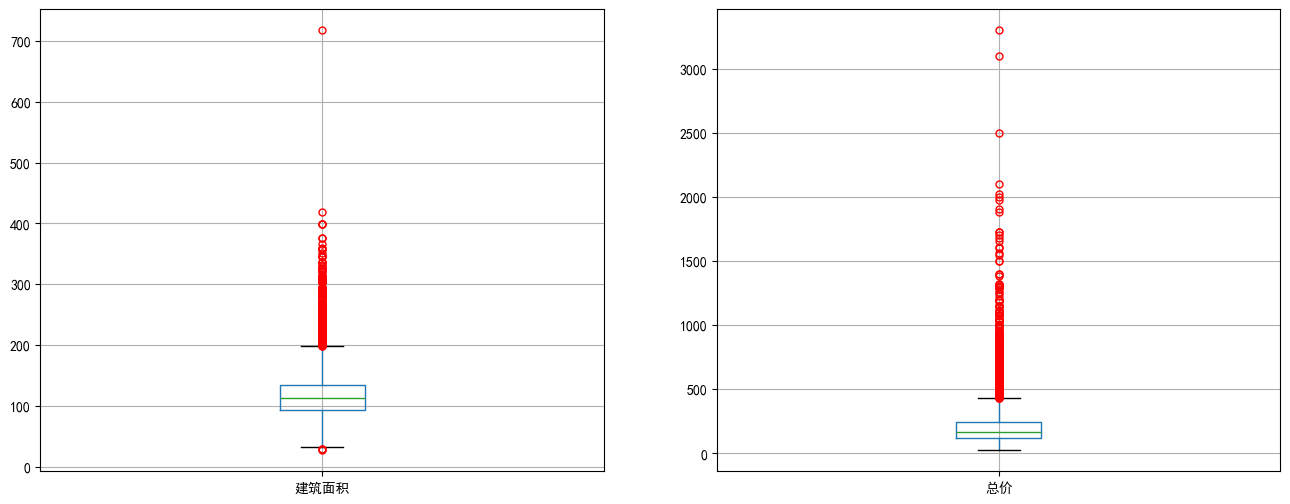

In [24]:
#箱型图
fig,ax=plt.subplots(1,2,figsize=(16,6))
df.boxplot(
    column=["建筑面积"],  # 指定要绘制的列
    ax=ax[0], 
    flierprops={
        'marker': 'o',  # 异常值的标记形状为圆形
        'markeredgecolor': 'red',  # 异常值标记的边缘颜色为红色
        'markersize': 5  # 异常值标记的大小
    }
)
df.boxplot(
    column=["总价"],
    ax=ax[1], 
    flierprops={
        'marker': 'o',
        'markeredgecolor': 'red',  
        'markersize': 5  # 异常值标记的大小
    }
)
plt.show()

In [25]:
#将房价高于2000万的删掉
df.drop(index=df[df["总价"]>2000].index,inplace=True)

In [26]:
#对于建筑年份，可以看到最小值在1994，但是最大值在2026年
#删除大于2025年的房子
df.drop(index=df[df["建筑年代"]>2025].index,inplace=True)

In [27]:
df.shape

(5885, 16)

## 数据保存

In [28]:
#将清洗完毕的数据进行保存，便于后续的分析与可视化
df.to_csv("wuhan_houses_clean.csv",encoding='utf-8',index=False)